In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time
import idx2numpy

In [23]:
# Загрузка данных
X_train = idx2numpy.convert_from_file('mnist_data/train-images.idx3-ubyte')
X_test = idx2numpy.convert_from_file('mnist_data/t10k-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('mnist_data/train-labels.idx1-ubyte')
y_test = idx2numpy.convert_from_file('mnist_data/t10k-labels.idx1-ubyte')
print(f"Размер тренировочных данных (изображения, метки): {X_train.shape}; {y_train.shape}")
print(f"Размер тестовых данных (изображения, метки): {X_test.shape}; {y_test.shape}")

Размер тренировочных данных (изображения, метки): (60000, 28, 28); (60000,)
Размер тестовых данных (изображения, метки): (10000, 28, 28); (10000,)


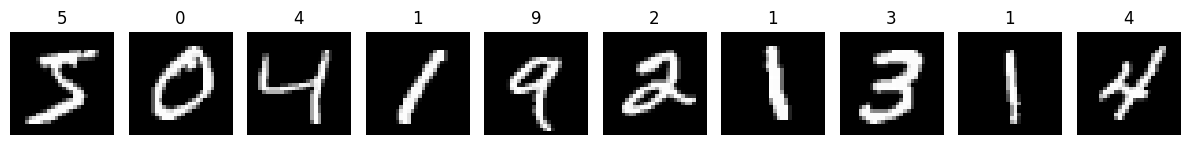

In [24]:
fig, axes = plt.subplots(1, 10, figsize=(12, 5))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_title(label)
    ax.imshow(image, cmap='gray')
    ax.axis("off")
plt.tight_layout()
plt.show()

In [30]:
class SimpleNeuralNetwork:
    def __init__(self, w, h, k, s, learning_rate=0.1):
        self.w = w
        self.h = h
        self.k = k
        self.s = s
        self.learning_rate = learning_rate
        
        # Инициализация весов
        self.W1 = np.random.randn(w * h, s) * 0.01  # Входной слой -> скрытый слой
        self.b1 = np.zeros((1, s))                   # Смещение скрытого слоя
        self.W2 = np.random.randn(s, k) * 0.01       # Скрытый слой -> выходной слой
        self.b2 = np.zeros((1, k))                   # Смещение выходного слоя

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        return -np.sum(y_true * np.log(y_pred + 1e-15)) / m

    def forward(self, X):
        # Прямое распространение
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true, y_pred):
        m = y_true.shape[0]

        # Вычисление градиентов
        dZ2 = y_pred - y_true
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Обновление весов
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X_train, y_train, batch_size=32, epochs=20):
        for epoch in range(epochs):
            start = time.time()
            for i in range(0, len(X_train), batch_size):    
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]

                # Прямое и обратное распространение
                y_pred = self.forward(X_batch)
                loss = self.cross_entropy_loss(y_batch, y_pred)
                self.backward(X_batch, y_batch, y_pred)
            runtime = time.time() - start
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}, Time: {runtime} sec')
            
X_train_images = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])
X_train_images = X_train_images / 255
y_train_labels = np.eye(10)[y_train]

# Инициализация и обучение сети
nn = SimpleNeuralNetwork(w=28, h=28, k=10, s=300)
nn.train(X_train_images, y_train_labels, batch_size=32, epochs=20)


Epoch 1/20, Loss: 0.0576, Time: 1.7416930198669434 sec
Epoch 2/20, Loss: 0.0322, Time: 1.5641489028930664 sec
Epoch 3/20, Loss: 0.0334, Time: 1.5776524543762207 sec
Epoch 4/20, Loss: 0.0359, Time: 1.5580260753631592 sec
Epoch 5/20, Loss: 0.0323, Time: 1.5565612316131592 sec
Epoch 6/20, Loss: 0.0310, Time: 1.5556304454803467 sec
Epoch 7/20, Loss: 0.0258, Time: 1.7427217960357666 sec
Epoch 8/20, Loss: 0.0265, Time: 1.5697731971740723 sec
Epoch 9/20, Loss: 0.0220, Time: 1.5875236988067627 sec
Epoch 10/20, Loss: 0.0167, Time: 1.5680396556854248 sec
Epoch 11/20, Loss: 0.0111, Time: 1.573746919631958 sec
Epoch 12/20, Loss: 0.0079, Time: 1.999100685119629 sec
Epoch 13/20, Loss: 0.0062, Time: 1.5609838962554932 sec
Epoch 14/20, Loss: 0.0052, Time: 1.5812318325042725 sec
Epoch 15/20, Loss: 0.0048, Time: 1.8787648677825928 sec
Epoch 16/20, Loss: 0.0042, Time: 1.7238893508911133 sec
Epoch 17/20, Loss: 0.0036, Time: 1.6553425788879395 sec
Epoch 18/20, Loss: 0.0031, Time: 2.4731383323669434 sec
Epo

In [33]:
X_test_images = X_test.reshape(-1, X_test.shape[1] * X_test.shape[2])
X_test_images = X_test_images / 255
y_test_labels = np.eye(10)[y_test]
predictions = nn.forward(X_test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test_labels, axis=1)
accuracy = np.mean(predicted_labels == true_labels) * 100

loss = nn.cross_entropy_loss(y_test_labels, predictions)

print(f"Accuracy on test data: {accuracy:.2f}%")
print(f"Loss on test data: {loss:.2f}%")

Accuracy on test data: 98.13%
Loss on test data: 0.07%
